# ECON 5140: Applied Econometrics
## Homework 2: Regression/ETS Models & ARIMA Models

**Covers:** Lesson 3 (Regression and ETS) & Lesson 4 (ARIMA Models)

---

# PART 1: REGRESSION AND ETS MODELS

## Section A: Analytical Problems (Regression & ETS)

### Problem 1: Simple Exponential Smoothing (SES)

A coffee shop tracks daily sales. The current level estimate is ℓ₉ = 250 (cups sold). 
On day 10, actual sales are y₁₀ = 280 cups.

The shop uses Simple Exponential Smoothing with smoothing parameter α = 0.3.

**Questions:**

a) Calculate the updated level estimate ℓ₁₀ using: ℓₜ = αyₜ + (1-α)ℓₜ₋₁

b) What was the one-step-ahead forecast error on day 10?

c) Calculate the forecast for day 11: ŷ₁₁|₁₀

d) Rewrite the SES update as an error correction model and verify your answer to part (a).

e) If the smoothing parameter were increased to α = 0.7, would the new level estimate ℓ₁₀ be higher or lower? Why?


### Problem 2: Holt's Linear Trend Method

A streaming service tracks monthly subscriber growth. At the end of month 5:
- Level estimate: ℓ₅ = 10,000 subscribers
- Trend estimate: b₅ = 500 subscribers/month

In month 6, actual subscribers: y₆ = 11,200

The model uses: α = 0.4 (level smoothing), β = 0.2 (trend smoothing)

**Holt's equations:**
- ℓₜ = αyₜ + (1-α)(ℓₜ₋₁ + bₜ₋₁)
- bₜ = β(ℓₜ - ℓₜ₋₁) + (1-β)bₜ₋₁

**Questions:**

a) Calculate the updated level ℓ₆

b) Calculate the updated trend b₆

c) Generate forecasts for months 7 and 8:
   - ŷ₇|₆ = ℓ₆ + b₆
   - ŷ₈|₆ = ℓ₆ + 2b₆

### Problem 3: Forecast Evaluation Metrics

A forecaster generates 5 one-step-ahead forecasts:

| Period | Actual (yₜ) | Forecast (ŷₜ) | Error (eₜ) |
|--------|-------------|---------------|------------|
| 1      | 100         | 95            | 5          |
| 2      | 110         | 108           | 2          |
| 3      | 105         | 112           | -7         |
| 4      | 115         | 110           | 5          |
| 5      | 120         | 125           | -5         |

**Questions:**

a) Calculate the Mean Absolute Error (MAE): MAE = (1/n)Σ|eₜ|

b) Calculate the Mean Squared Error (MSE): MSE = (1/n)Σeₜ²

c) Calculate the Root Mean Squared Error (RMSE): RMSE = √MSE

d) Calculate the Mean Absolute Percentage Error (MAPE): MAPE = (1/n)Σ|eₜ/yₜ|×100%

e) Based on RMSE, which forecast error was most problematic? Why does RMSE penalize it more than MAE?

### Problem 4: MA(1) Model

Consider an MA(1) model: yₜ = εₜ + θεₜ₋₁

where εₜ ~ N(0, σ²) and θ = 0.6

At time t = 10:
- ε₁₀ = 2
- ε₉ = -1

**Questions:**

a) Calculate y₁₀

b) Calculate the one-step-ahead forecast ŷ₁₁|₁₀
   - Hint: E[ε₁₁] = 0

c) Calculate the two-step-ahead forecast ŷ₁₂|₁₀

d) Why does the MA(1) forecast return to zero after one step?

e) Calculate the lag-1 autocorrelation: ρ(1) = θ/(1 + θ²)

# PART 3: CODING PROBLEMS

## Problem 1: Comprehensive Time Series Forecasting
You will work with two datasets: retail sales (ETS/Regression) and stock returns (ARIMA).


DATASET 1: Monthly Retail Sales
Date range: 2021-01-01 to 2024-12-01
Number of months: 48

Sales Statistics:
count      48.000000
mean     1419.409544
std       352.878551
min       722.634428
25%      1196.284168
50%      1393.908200
75%      1710.667034
max      2412.774859
Name: Sales, dtype: float64

PART A: REGRESSION AND ETS MODELS

----------------------------------------------------------------------
A1: Exploratory Visualization
----------------------------------------------------------------------


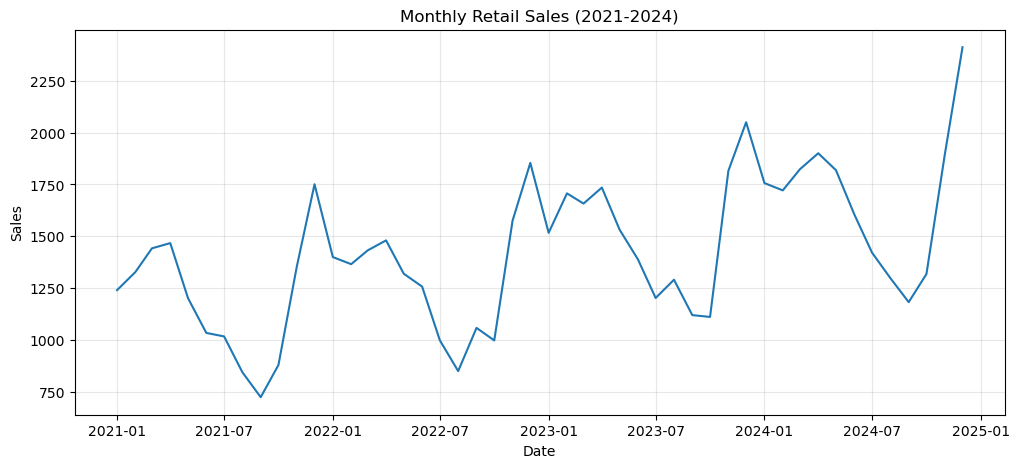

<Figure size 1000x500 with 0 Axes>

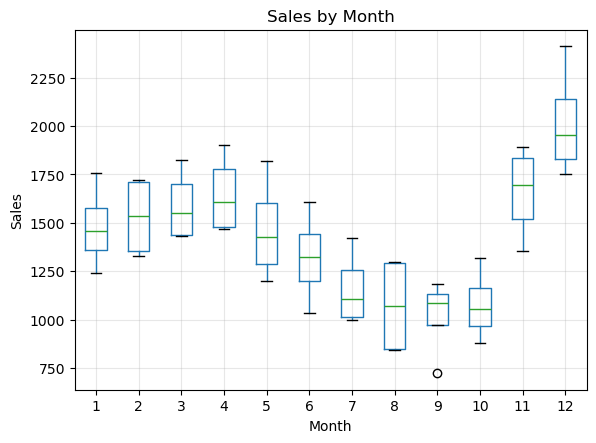

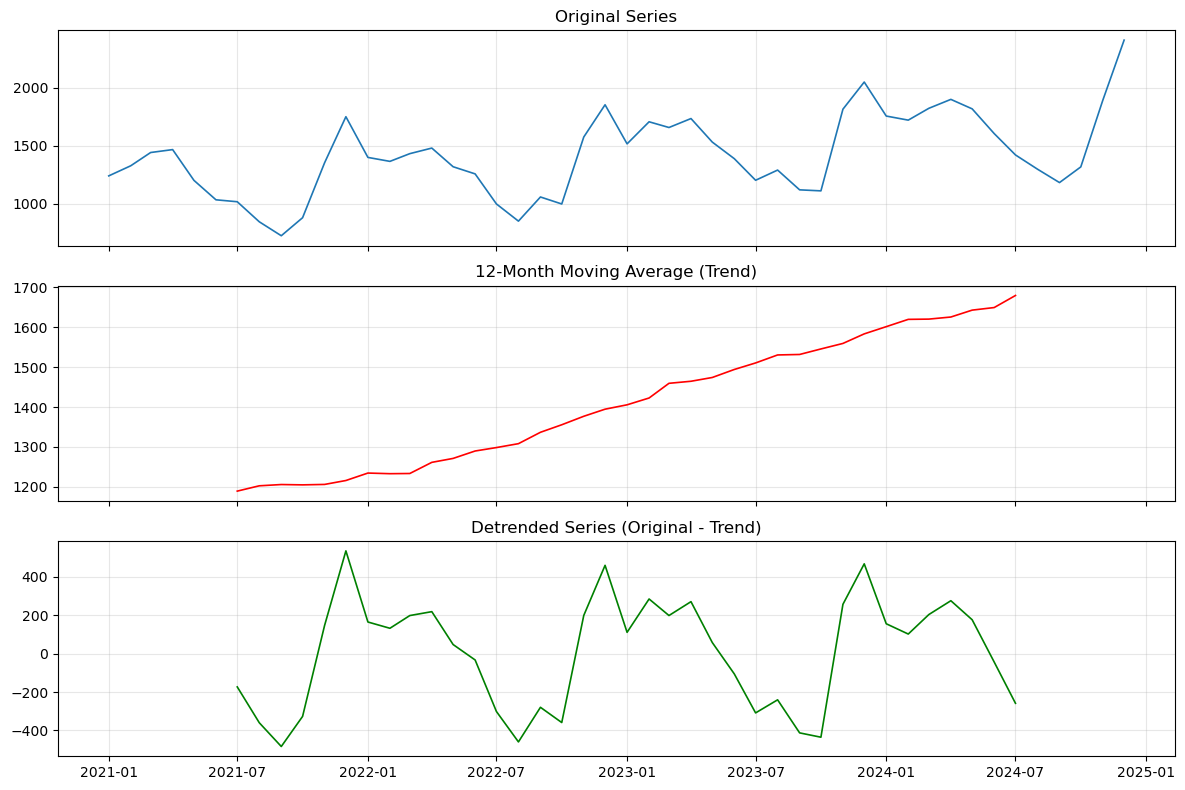

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)


# ====================================================================
# DATASET 1: RETAIL SALES (for Regression & ETS)
# ====================================================================
print("\n" + "=" * 70)
print("DATASET 1: Monthly Retail Sales")
print("=" * 70)

# Create 4 years of monthly data
dates = pd.date_range('2021-01-01', '2024-12-31', freq='MS')
n_months = len(dates)
t = np.arange(n_months)

# Components
trend = 1000 + 15*t  # Growing business
yearly_seasonal = 300 * np.sin(2*np.pi*t/12) + 200 * np.cos(2*np.pi*t/12)

# Holiday effects (November-December spike)
holiday_effect = np.zeros(n_months)
for year in range(4):
    nov_idx = year*12 + 10  # November
    dec_idx = year*12 + 11  # December
    if nov_idx < n_months:
        holiday_effect[nov_idx] = 400
    if dec_idx < n_months:
        holiday_effect[dec_idx] = 600

# Random noise
noise = np.random.normal(0, 80, n_months)

# Combine
sales = trend + yearly_seasonal + holiday_effect + noise
sales = np.maximum(sales, 0)

# Create DataFrame
df_sales = pd.DataFrame({
    'Date': dates,
    'Sales': sales,
    'Month': dates.month,
    'Year': dates.year,
    'Time': t
})
df_sales.set_index('Date', inplace=True)

print(f"Date range: {df_sales.index[0].date()} to {df_sales.index[-1].date()}")
print(f"Number of months: {len(df_sales)}")
print(f"\nSales Statistics:")
print(df_sales['Sales'].describe())

# ====================================================================
# PART A: REGRESSION AND ETS MODELS
# ====================================================================
print("\n" + "=" * 70)
print("PART A: REGRESSION AND ETS MODELS")
print("=" * 70)

# --------------------------------------------------------------------
# A1: Time Series Visualization
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("A1: Exploratory Visualization")
print("-" * 70)

# 1. Create time series plot of monthly sales
plt.figure(figsize=(12, 5))
plt.plot(df_sales.index, df_sales['Sales'], linewidth=1.5)
plt.title('Monthly Retail Sales (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Create seasonal subseries plot: box plot of sales by month
plt.figure(figsize=(10, 5))
df_sales.boxplot(column='Sales', by='Month')
plt.title('Sales by Month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Create a decomposition plot (conceptual)
trend_ma = df_sales['Sales'].rolling(window=12, center=True).mean()
detrended = df_sales['Sales'] - trend_ma
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
axes[0].plot(df_sales.index, df_sales['Sales'], linewidth=1.2)
axes[0].set_title('Original Series')
axes[1].plot(df_sales.index, trend_ma, color='red', linewidth=1.2)
axes[1].set_title('12-Month Moving Average (Trend)')
axes[2].plot(df_sales.index, detrended, color='green', linewidth=1.2)
axes[2].set_title('Detrended Series (Original - Trend)')
for ax in axes:
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
# --------------------------------------------------------------------
# A2: Linear Regression with Trend and Seasonality
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("A2: Regression Forecasting")
print("-" * 70)

# Ensure dataset is available
try:
    df_sales
except NameError as exc:
    raise RuntimeError("Run the dataset setup cell for PART A first.") from exc

# 1. Create seasonal dummy variables
month_dummies = pd.get_dummies(df_sales['Month'], drop_first=True, prefix='Month', dtype=int)

# 2. Fit regression model
X_reg = pd.concat([df_sales['Time'], month_dummies], axis=1)
X_reg = sm.add_constant(X_reg)
X_reg = X_reg.apply(pd.to_numeric, errors='coerce').astype(float)
y_reg = pd.to_numeric(df_sales['Sales'], errors='coerce').astype(float)

# Drop any rows with NaNs (safety)
valid_idx = X_reg.notna().all(axis=1) & y_reg.notna()
X_reg = X_reg.loc[valid_idx]
y_reg = y_reg.loc[valid_idx]

reg_model = sm.OLS(y_reg, X_reg).fit()

# 3. Print regression summary
print(reg_model.summary())

# 4. Interpretation
trend_coef = reg_model.params['Time']
seasonal_effects = reg_model.params.filter(like='Month_')
month_map = {f'Month_{i}': i for i in range(2, 13)}
max_month_label = seasonal_effects.idxmax()
max_month = month_map.get(max_month_label, 'Unknown')
print("\nInterpretation:")
print(f"  • Monthly trend (Time): {trend_coef:.2f} sales per month")
print(f"  • Largest seasonal effect: Month {max_month} ({max_month_label})")
print(f"  • Significant coefficients (p < 0.05): {(reg_model.pvalues < 0.05).sum()}/{len(reg_model.params)}")

# 5. Fitted values and accuracy
fitted_reg = reg_model.fittedvalues
r2 = reg_model.rsquared
rmse = np.sqrt(np.mean((y_reg - fitted_reg) ** 2))
mae = np.mean(np.abs(y_reg - fitted_reg))
print("\nModel Fit:")
print(f"  • R²: {r2:.4f}")
print(f"  • RMSE: {rmse:.2f}")
print(f"  • MAE: {mae:.2f}")



----------------------------------------------------------------------
A2: Regression Forecasting
----------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     83.27
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           4.66e-22
Time:                        20:33:32   Log-Likelihood:                -267.91
No. Observations:                  48   AIC:                             561.8
Df Residuals:                      35   BIC:                             586.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err        


----------------------------------------------------------------------
A3: Fourier Seasonality
----------------------------------------------------------------------

Model Comparison (Dummy vs Fourier):
  • Dummy R²: 0.9662, AIC: 561.82, Params: 13
  • Fourier R²: 0.8631, AIC: 614.92, Params: 6


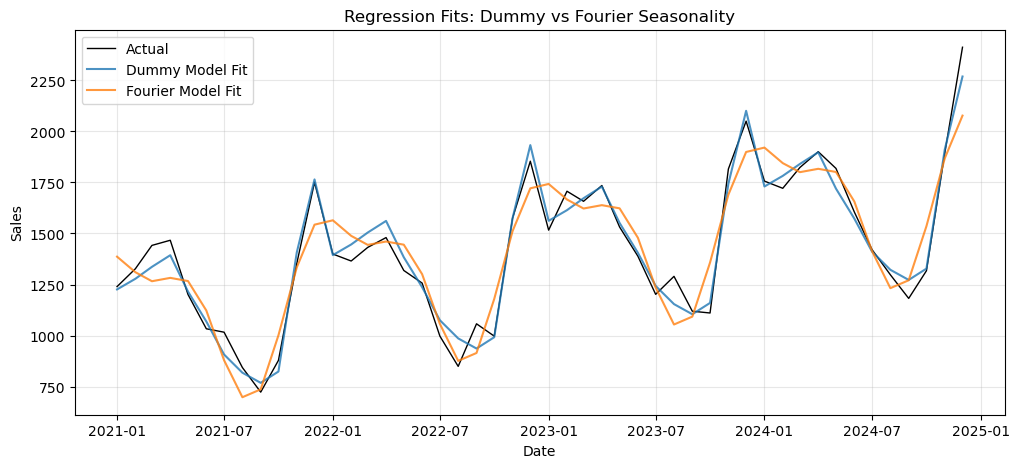


Preferred approach: Month dummies (lower AIC, more flexible seasonal effects)


In [11]:
# --------------------------------------------------------------------
# A3: Fourier Terms for Seasonality
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("A3: Fourier Seasonality")
print("-" * 70)

# Ensure regression baseline exists (run A2 first or rebuild here)
try:
    reg_model
    X_reg
    y_reg
except NameError:
    y_reg = df_sales['Sales']
    month_dummies = pd.get_dummies(df_sales['Month'], drop_first=True, prefix='Month')
    X_reg = pd.concat([df_sales['Time'], month_dummies], axis=1)
    X_reg = sm.add_constant(X_reg)
    reg_model = sm.OLS(y_reg, X_reg).fit()

# 1. Create Fourier terms for yearly seasonality (m=12)
fourier_terms = pd.DataFrame(index=df_sales.index)
for k in [1, 2]:
    fourier_terms[f'sin{k}'] = np.sin(2 * np.pi * k * df_sales['Time'] / 12)
    fourier_terms[f'cos{k}'] = np.cos(2 * np.pi * k * df_sales['Time'] / 12)

# 2. Fit regression with Fourier terms
X_fourier = pd.concat([df_sales['Time'], fourier_terms], axis=1)
X_fourier = sm.add_constant(X_fourier)
fourier_model = sm.OLS(y_reg, X_fourier).fit()

# 3. Compare with dummy variable model
print("\nModel Comparison (Dummy vs Fourier):")
print(f"  • Dummy R²: {reg_model.rsquared:.4f}, AIC: {reg_model.aic:.2f}, Params: {len(reg_model.params)}")
print(f"  • Fourier R²: {fourier_model.rsquared:.4f}, AIC: {fourier_model.aic:.2f}, Params: {len(fourier_model.params)}")

# 4. Plot fitted values from both models on same graph
plt.figure(figsize=(12, 5))
plt.plot(df_sales.index, y_reg, label='Actual', color='black', linewidth=1)
plt.plot(df_sales.index, reg_model.fittedvalues, label='Dummy Model Fit', alpha=0.8)
plt.plot(df_sales.index, fourier_model.fittedvalues, label='Fourier Model Fit', alpha=0.8)
plt.title('Regression Fits: Dummy vs Fourier Seasonality')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. Preference
if fourier_model.aic < reg_model.aic:
    pref = 'Fourier terms (lower AIC with fewer parameters)'
elif reg_model.aic < fourier_model.aic:
    pref = 'Month dummies (lower AIC, more flexible seasonal effects)'
else:
    pref = 'Both models are similar; choose based on interpretability'
print(f"\nPreferred approach: {pref}")


In [12]:
# --------------------------------------------------------------------
# A4: Simple Exponential Smoothing (SES)
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("A4: Simple Exponential Smoothing")
print("-" * 70)

# 1. Deseasonalize sales using seasonal averages (use first 36 months)
train_sales = df_sales['Sales'].iloc[:36]
test_sales = df_sales['Sales'].iloc[36:]
seasonal_avg = train_sales.groupby(train_sales.index.month).mean()
seasonal_component = df_sales.index.month.map(seasonal_avg).values
deseasonal = df_sales['Sales'] - seasonal_component
train_deseasonal = deseasonal.iloc[:36]

# 2. Fit SES on deseasonalized data
ses_model = SimpleExpSmoothing(train_deseasonal).fit(optimized=True)
alpha_ses = ses_model.params['smoothing_level']

# 3. Print optimized alpha
print(f"Optimized alpha (SES): {alpha_ses:.4f}")
print("Interpretation: Higher alpha means more weight on recent observations.")

# 4. Generate forecasts for next 12 months (deseasonalized)
ses_forecast_deseasonal = ses_model.forecast(12)

# 5. Add seasonality back to forecasts
seasonal_next = pd.Series(test_sales.index.month, index=test_sales.index).map(seasonal_avg).values
ses_forecast = ses_forecast_deseasonal.values + seasonal_next

# 6. Forecast accuracy on holdout period
rmse_ses = np.sqrt(np.mean((test_sales.values - ses_forecast) ** 2))
mae_ses = np.mean(np.abs(test_sales.values - ses_forecast))
print(f"SES Holdout RMSE: {rmse_ses:.2f}")
print(f"SES Holdout MAE: {mae_ses:.2f}")



----------------------------------------------------------------------
A4: Simple Exponential Smoothing
----------------------------------------------------------------------
Optimized alpha (SES): 0.4112
Interpretation: Higher alpha means more weight on recent observations.
SES Holdout RMSE: 186.05
SES Holdout MAE: 167.26



----------------------------------------------------------------------
A5: Holt's Method
----------------------------------------------------------------------
Optimized alpha (Holt): 0.0041
Optimized beta  (Holt): 0.0000
Final level (l_t): 200.82
Final trend (b_t): 11.28


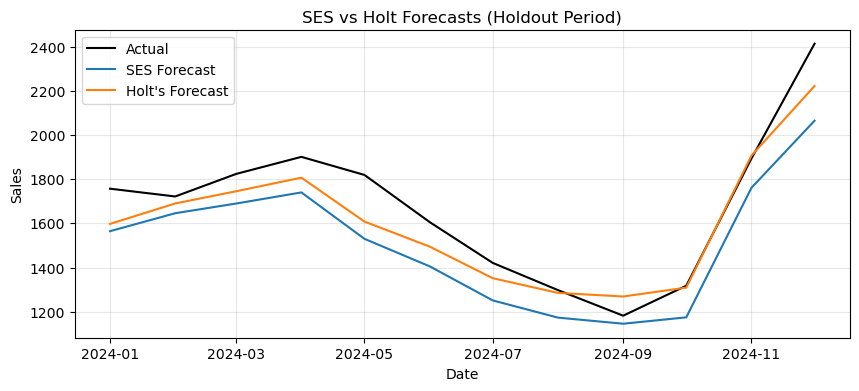

In [13]:
# --------------------------------------------------------------------
# A5: Holt's Linear Trend Method
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("A5: Holt's Method")
print("-" * 70)

# 1. Fit Holt's linear trend method on deseasonalized data
holt_model = ExponentialSmoothing(train_deseasonal, trend='add', seasonal=None).fit(optimized=True)

# 2. Print optimized parameters
alpha_holt = holt_model.params['smoothing_level']
beta_holt = holt_model.params['smoothing_trend']
print(f"Optimized alpha (Holt): {alpha_holt:.4f}")
print(f"Optimized beta  (Holt): {beta_holt:.4f}")

# 3. Extract final state
level_final = holt_model.level[-1]
trend_final = holt_model.trend[-1]
print(f"Final level (l_t): {level_final:.2f}")
print(f"Final trend (b_t): {trend_final:.2f}")

# 4. Generate 12-month forecasts and add seasonality back
holt_forecast_deseasonal = holt_model.forecast(12)
holt_forecast = holt_forecast_deseasonal.values + seasonal_next

# 5. Compare with SES
plt.figure(figsize=(10, 4))
plt.plot(test_sales.index, test_sales.values, label='Actual', color='black')
plt.plot(test_sales.index, ses_forecast, label='SES Forecast')
plt.plot(test_sales.index, holt_forecast, label="Holt's Forecast")
plt.title('SES vs Holt Forecasts (Holdout Period)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



----------------------------------------------------------------------
A6: Holt-Winters Method
----------------------------------------------------------------------
Optimized alpha (HW): 0.1662
Optimized beta  (HW): 0.1601
Optimized gamma (HW): 0.0013


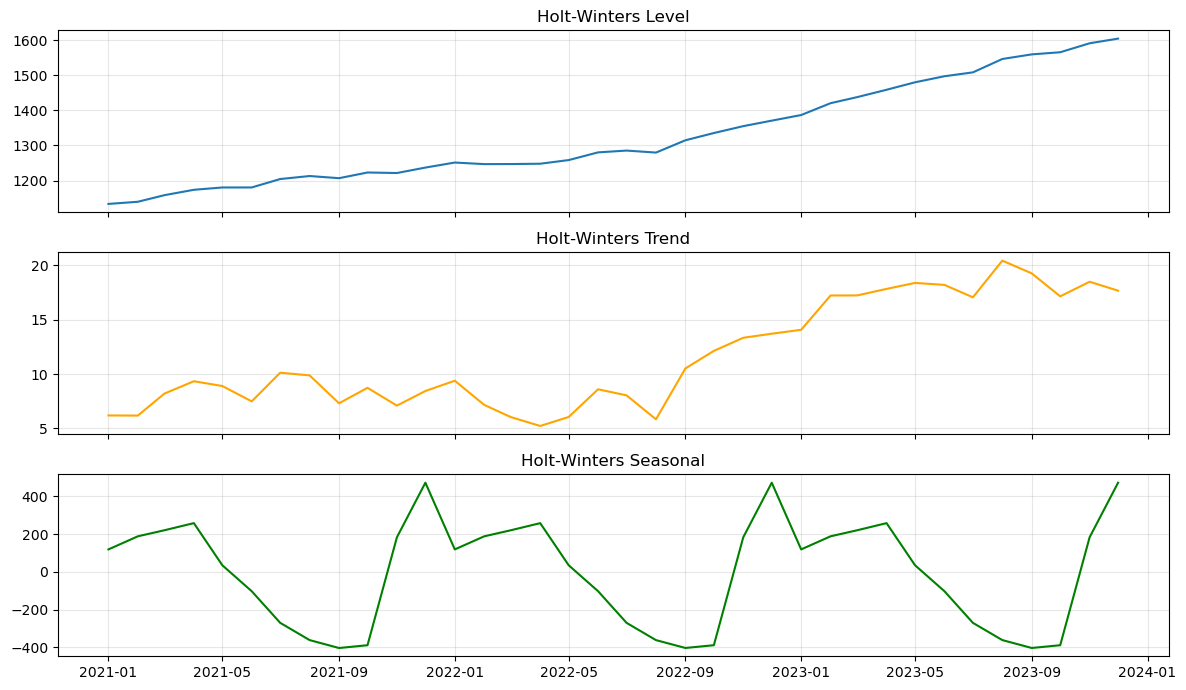


Forecast Accuracy (Holdout 12 months):
  • Regression RMSE: 61.58, MAE: 44.65
  • SES RMSE:        186.05, MAE: 167.26
  • Holt RMSE:       110.92, MAE: 88.94
  • Holt-Winters RMSE: 88.08, MAE: 74.14


In [16]:
# --------------------------------------------------------------------
# A6: Holt-Winters Seasonal Method
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("A6: Holt-Winters Method")
print("-" * 70)

# Ensure regression baseline exists (run A2 first or rebuild here)
try:
    reg_model
    X_reg
except NameError:
    month_dummies = pd.get_dummies(df_sales['Month'], drop_first=True, prefix='Month')
    X_reg = pd.concat([df_sales['Time'], month_dummies], axis=1)
    X_reg = sm.add_constant(X_reg)
    reg_model = sm.OLS(df_sales['Sales'], X_reg).fit()

# 1. Fit Holt-Winters with additive seasonality
hw_model = ExponentialSmoothing(
    train_sales,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit(optimized=True)

# 2. Print optimized parameters
alpha_hw = hw_model.params['smoothing_level']
beta_hw = hw_model.params['smoothing_trend']
gamma_hw = hw_model.params['smoothing_seasonal']
print(f"Optimized alpha (HW): {alpha_hw:.4f}")
print(f"Optimized beta  (HW): {beta_hw:.4f}")
print(f"Optimized gamma (HW): {gamma_hw:.4f}")

# 3. Extract components
level_hw = hw_model.level
trend_hw = hw_model.trend
season_hw = hw_model.season

# 4. Plot decomposition from Holt-Winters
fig, axes = plt.subplots(3, 1, figsize=(12, 7), sharex=True)
axes[0].plot(level_hw, label='Level')
axes[0].set_title('Holt-Winters Level')
axes[1].plot(trend_hw, label='Trend', color='orange')
axes[1].set_title('Holt-Winters Trend')
axes[2].plot(season_hw, label='Seasonal', color='green')
axes[2].set_title('Holt-Winters Seasonal')
for ax in axes:
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Generate 12-month forecasts
hw_forecast = hw_model.forecast(12)

# 6. Compare forecast accuracy with regression, SES, Holt
reg_forecast = reg_model.predict(X_reg.iloc[36:])
rmse_reg = np.sqrt(np.mean((test_sales.values - reg_forecast.values) ** 2))
mae_reg = np.mean(np.abs(test_sales.values - reg_forecast.values))
rmse_holt = np.sqrt(np.mean((test_sales.values - holt_forecast) ** 2))
mae_holt = np.mean(np.abs(test_sales.values - holt_forecast))
rmse_hw = np.sqrt(np.mean((test_sales.values - hw_forecast.values) ** 2))
mae_hw = np.mean(np.abs(test_sales.values - hw_forecast.values))

print("\nForecast Accuracy (Holdout 12 months):")
print(f"  • Regression RMSE: {rmse_reg:.2f}, MAE: {mae_reg:.2f}")
print(f"  • SES RMSE:        {rmse_ses:.2f}, MAE: {mae_ses:.2f}")
print(f"  • Holt RMSE:       {rmse_holt:.2f}, MAE: {mae_holt:.2f}")
print(f"  • Holt-Winters RMSE: {rmse_hw:.2f}, MAE: {mae_hw:.2f}")



PART B: ARIMA MODELS

DATASET 2: Daily Stock Returns
Date range: 2023-01-01 to 2024-05-14
Number of days: 500

Price Statistics:
count    500.000000
mean     115.002874
std       12.793924
min       94.210519
25%      102.898666
50%      115.340500
75%      125.312316
max      149.153080
Name: Price, dtype: float64

----------------------------------------------------------------------
B1: Stationarity Tests
----------------------------------------------------------------------


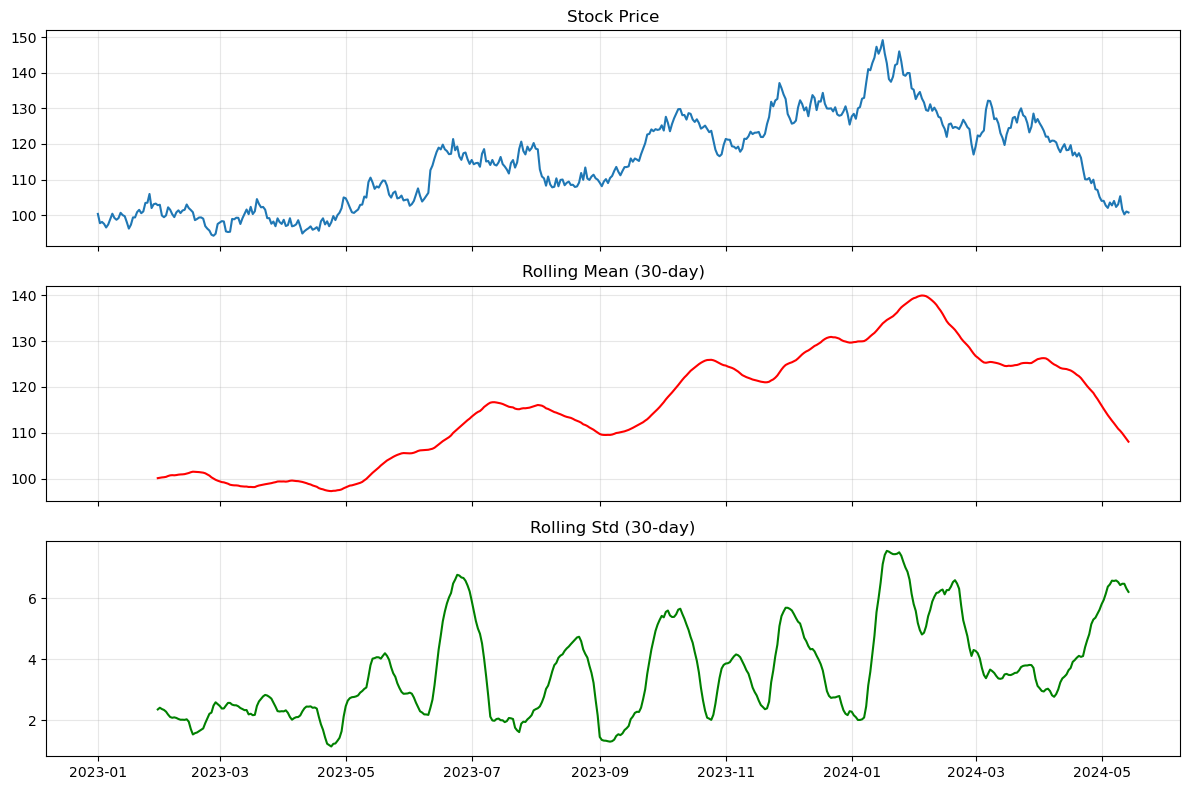

ADF Statistic: -1.5185
ADF p-value: 0.5243
KPSS Statistic: 2.5618
KPSS p-value: 0.0100

Interpretation:
  • ADF null: unit root (non-stationary).
  • KPSS null: stationary.
  • Tests suggest non-stationarity in prices.


In [17]:
# ====================================================================
# PART B: ARIMA MODELS
# ====================================================================
print("\n" + "=" * 70)
print("PART B: ARIMA MODELS")
print("=" * 70)

# ====================================================================
# DATASET 2: DAILY STOCK RETURNS (for ARIMA)
# ====================================================================
print("\n" + "=" * 70)
print("DATASET 2: Daily Stock Returns")
print("=" * 70)

# Create 500 days of stock price data
n_days = 500
dates_stock = pd.date_range('2023-01-01', periods=n_days, freq='D')

# Generate AR(1) returns with some volatility clustering
returns = np.zeros(n_days)
returns[0] = np.random.normal(0, 0.01)

phi = 0.05  # Small autocorrelation in returns
for i in range(1, n_days):
    returns[i] = phi * returns[i-1] + np.random.normal(0, 0.015)

# Calculate price from returns (starting at 100)
price = 100 * np.exp(np.cumsum(returns))

df_stock = pd.DataFrame({
    'Date': dates_stock,
    'Price': price,
    'Returns': returns * 100  # Convert to percentage
})
df_stock.set_index('Date', inplace=True)

print(f"Date range: {df_stock.index[0].date()} to {df_stock.index[-1].date()}")
print(f"Number of days: {len(df_stock)}")
print(f"\nPrice Statistics:")
print(df_stock['Price'].describe())

# --------------------------------------------------------------------
# B1: Stationarity Testing
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B1: Stationarity Tests")
print("-" * 70)

# 1. Visual stationarity check for stock prices
rolling_mean = df_stock['Price'].rolling(window=30).mean()
rolling_std = df_stock['Price'].rolling(window=30).std()

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
axes[0].plot(df_stock.index, df_stock['Price'], label='Price')
axes[0].set_title('Stock Price')
axes[1].plot(df_stock.index, rolling_mean, color='red', label='Rolling Mean (30)')
axes[1].set_title('Rolling Mean (30-day)')
axes[2].plot(df_stock.index, rolling_std, color='green', label='Rolling Std (30)')
axes[2].set_title('Rolling Std (30-day)')
for ax in axes:
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. ADF test on prices
adf_stat, adf_pvalue, *_ = adfuller(df_stock['Price'])
print(f"ADF Statistic: {adf_stat:.4f}")
print(f"ADF p-value: {adf_pvalue:.4f}")

# 3. KPSS test on prices
kpss_stat, kpss_pvalue, *_ = kpss(df_stock['Price'], regression='c', nlags='auto')
print(f"KPSS Statistic: {kpss_stat:.4f}")
print(f"KPSS p-value: {kpss_pvalue:.4f}")

# 4. Interpretation
print("\nInterpretation:")
print("  • ADF null: unit root (non-stationary).")
print("  • KPSS null: stationary.")
if adf_pvalue < 0.05 and kpss_pvalue > 0.05:
    print("  • Both tests suggest stationarity.")
else:
    print("  • Tests suggest non-stationarity in prices.")


In [ ]:
# --------------------------------------------------------------------
# B2: First Differencing
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B2: Differencing for Stationarity")
print("-" * 70)

# 1. Calculate first differences of prices
diff_price = df_stock['Price'].diff().dropna()

# 2. Plot the differenced series
plt.figure(figsize=(12, 4))
plt.plot(diff_price.index, diff_price.values)
plt.title('First Difference of Price')
plt.xlabel('Date')
plt.ylabel('Diff Price')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Run ADF test on differenced series
adf_stat_diff, adf_pvalue_diff, *_ = adfuller(diff_price)
print(f"ADF Statistic (diff): {adf_stat_diff:.4f}")
print(f"ADF p-value (diff): {adf_pvalue_diff:.4f}")

# 4. Compare with returns
returns_series = df_stock['Returns'].iloc[1:]
correlation = np.corrcoef(diff_price.values, returns_series.values)[0, 1]
print(f"Correlation between diff price and returns: {correlation:.4f}")

# 5. Plot ACF of differenced prices
plt.figure(figsize=(10, 4))
plot_acf(diff_price, lags=30)
plt.title('ACF of Differenced Prices')
plt.show()



----------------------------------------------------------------------
B3: ACF and PACF
----------------------------------------------------------------------


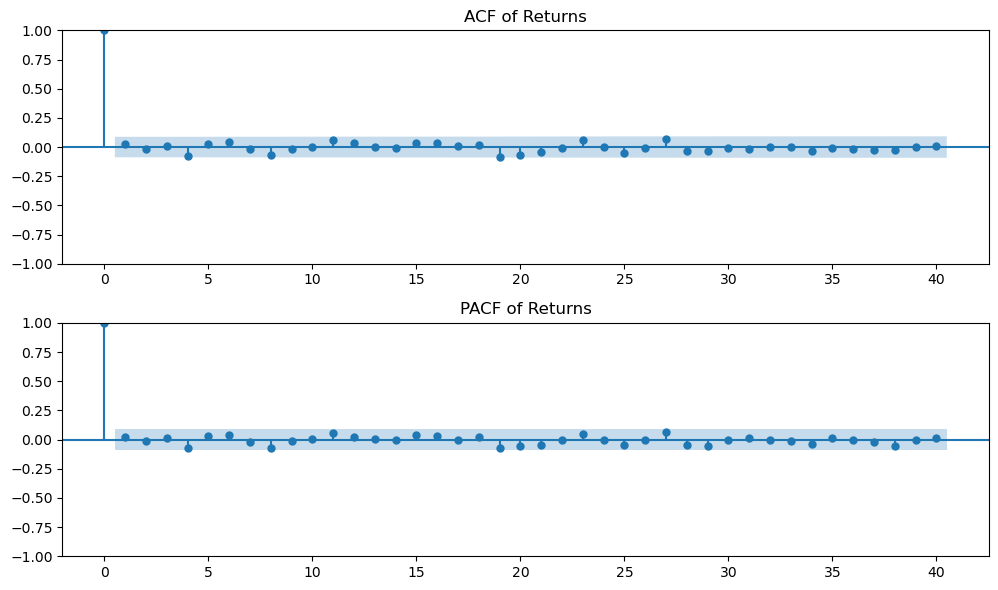

ACF/PACF interpretation: look for significant spikes to suggest AR/MA order.
Manual autocorrelation rho(1): 0.0238
Manual autocorrelation rho(5): 0.0273


In [18]:
# --------------------------------------------------------------------
# B3: ACF and PACF Analysis
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B3: ACF and PACF")
print("-" * 70)

# Work with returns (already stationary)
returns_series_full = df_stock['Returns']

# 1. Create 2x1 subplot
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(returns_series_full, lags=40, ax=axes[0])
axes[0].set_title('ACF of Returns')
plot_pacf(returns_series_full, lags=40, ax=axes[1], method='ywm')
axes[1].set_title('PACF of Returns')
plt.tight_layout()
plt.show()

# 2-3. Interpretation (printed summary)
print("ACF/PACF interpretation: look for significant spikes to suggest AR/MA order.")

# 4. Manual autocorrelations
lag1 = np.corrcoef(returns_series_full.iloc[1:], returns_series_full.iloc[:-1])[0, 1]
lag5 = np.corrcoef(returns_series_full.iloc[5:], returns_series_full.iloc[:-5])[0, 1]
print(f"Manual autocorrelation rho(1): {lag1:.4f}")
print(f"Manual autocorrelation rho(5): {lag5:.4f}")



----------------------------------------------------------------------
B4: AR(p) Model
----------------------------------------------------------------------
                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -902.468
Date:                Tue, 10 Feb 2026   AIC                           1810.936
Time:                        22:27:31   BIC                           1823.579
Sample:                    01-01-2023   HQIC                          1815.897
                         - 05-14-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.068      0.022      0.

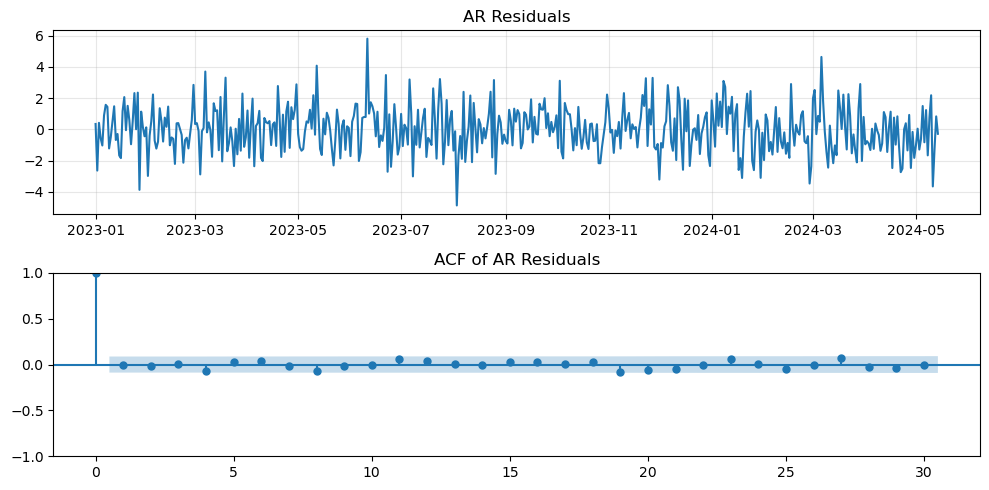

In [22]:
# --------------------------------------------------------------------
# B4: AR Model Estimation
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B4: AR(p) Model")
print("-" * 70)

# 1. Fit AR(1) model on returns
ar1_model = ARIMA(returns_series_full, order=(1, 0, 0)).fit()
print(ar1_model.summary())

# 2. Extract and interpret
phi1 = ar1_model.params.get('ar.L1', np.nan)
phi1_p = ar1_model.pvalues.get('ar.L1', np.nan)
print(f"phi1: {phi1:.4f} (p-value: {phi1_p:.4f})")
print(f"Stationarity check |phi1| < 1: {abs(phi1) < 1}")

# 4. Fit AR(2) and AR(3) and compare AIC
ar2_model = ARIMA(returns_series_full, order=(2, 0, 0)).fit()
ar3_model = ARIMA(returns_series_full, order=(3, 0, 0)).fit()
print(f"AR(1) AIC: {ar1_model.aic:.2f}")
print(f"AR(2) AIC: {ar2_model.aic:.2f}")
print(f"AR(3) AIC: {ar3_model.aic:.2f}")

best_ar_model = min([ar1_model, ar2_model, ar3_model], key=lambda m: m.aic)
print(f"Best AR model by AIC: AR({best_ar_model.model_orders['ar']})")

# 5. Residual diagnostics
resid_ar = best_ar_model.resid
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].plot(resid_ar)
axes[0].set_title('AR Residuals')
axes[0].grid(True, alpha=0.3)
plot_acf(resid_ar, lags=30, ax=axes[1])
axes[1].set_title('ACF of AR Residuals')
plt.tight_layout()
plt.show()



----------------------------------------------------------------------
B5: MA(q) Model
----------------------------------------------------------------------
                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  500
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -902.464
Date:                Tue, 10 Feb 2026   AIC                           1810.928
Time:                        22:27:38   BIC                           1823.572
Sample:                    01-01-2023   HQIC                          1815.889
                         - 05-14-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.068      0.022      0.

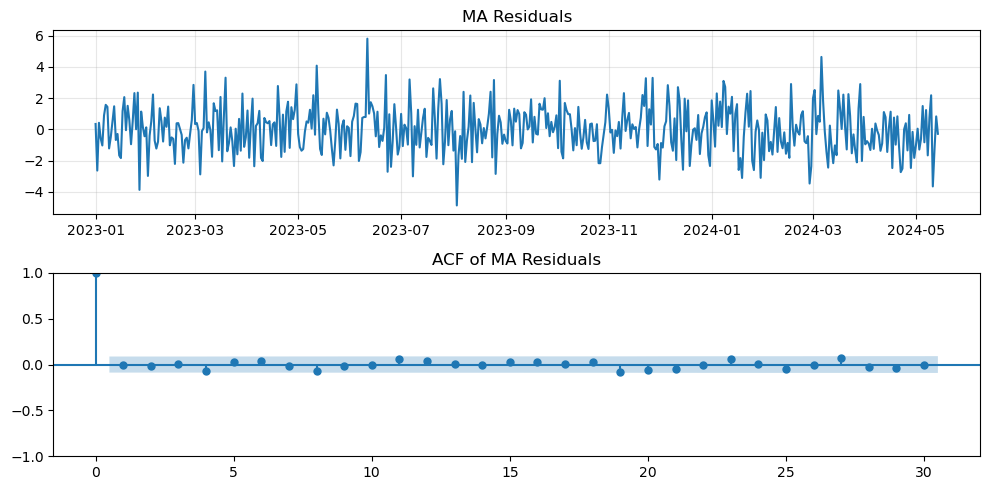

In [23]:
# --------------------------------------------------------------------
# B5: MA Model Estimation
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B5: MA(q) Model")
print("-" * 70)

# 1. Fit MA(1) model on returns
ma1_model = ARIMA(returns_series_full, order=(0, 0, 1)).fit()
print(ma1_model.summary())

# 2. Interpret MA(1)
theta1 = ma1_model.params.get('ma.L1', np.nan)
theta1_p = ma1_model.pvalues.get('ma.L1', np.nan)
print(f"theta1: {theta1:.4f} (p-value: {theta1_p:.4f})")
print(f"Invertibility check |theta1| < 1: {abs(theta1) < 1}")

# 4. Compare MA(1) vs AR(1)
print("\nModel Comparison: AR(1) vs MA(1)")
print(f"AR(1) AIC: {ar1_model.aic:.2f}, BIC: {ar1_model.bic:.2f}, LogLik: {ar1_model.llf:.2f}")
print(f"MA(1) AIC: {ma1_model.aic:.2f}, BIC: {ma1_model.bic:.2f}, LogLik: {ma1_model.llf:.2f}")

# 5. Residual diagnostics for MA(1)
resid_ma = ma1_model.resid
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].plot(resid_ma)
axes[0].set_title('MA Residuals')
axes[0].grid(True, alpha=0.3)
plot_acf(resid_ma, lags=30, ax=axes[1])
axes[1].set_title('ACF of MA Residuals')
plt.tight_layout()
plt.show()


In [24]:
# --------------------------------------------------------------------
# B6: ARMA Model
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B6: ARMA(p,q) Model")
print("-" * 70)

# 1. Fit ARMA(1,1) on returns
arma11_model = ARIMA(returns_series_full, order=(1, 0, 1)).fit()
print(arma11_model.summary())

# 2. Compare with AR(1) and MA(1)
print("\nAIC Comparison:")
print(f"  • AR(1) AIC: {ar1_model.aic:.2f}")
print(f"  • MA(1) AIC: {ma1_model.aic:.2f}")
print(f"  • ARMA(1,1) AIC: {arma11_model.aic:.2f}")

# 3. Overparameterization check
phi1_p = arma11_model.pvalues.get('ar.L1', np.nan)
theta1_p = arma11_model.pvalues.get('ma.L1', np.nan)
print(f"AR term p-value: {phi1_p:.4f}")
print(f"MA term p-value: {theta1_p:.4f}")

# 4. Comparison table
comparison_df = pd.DataFrame({
    'Model': ['AR(1)', 'MA(1)', 'ARMA(1,1)'],
    'AIC': [ar1_model.aic, ma1_model.aic, arma11_model.aic],
    'BIC': [ar1_model.bic, ma1_model.bic, arma11_model.bic],
    'LogLik': [ar1_model.llf, ma1_model.llf, arma11_model.llf],
    'Parameters': [len(ar1_model.params), len(ma1_model.params), len(arma11_model.params)]
})
print("\nModel Comparison Table:")
print(comparison_df.to_string(index=False))



----------------------------------------------------------------------
B6: ARMA(p,q) Model
----------------------------------------------------------------------
                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  500
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -901.801
Date:                Tue, 10 Feb 2026   AIC                           1811.602
Time:                        22:27:44   BIC                           1828.461
Sample:                    01-01-2023   HQIC                          1818.217
                         - 05-14-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.068      0.022    

In [ ]:
# --------------------------------------------------------------------
# B7: Automatic ARIMA Selection
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B7: Automatic ARIMA")
print("-" * 70)

# 1. Grid search for best ARIMA(p,0,q) by AIC
best_aic = np.inf
best_order = None
best_fit = None

for p in range(6):
    for q in range(6):
        try:
            model = ARIMA(returns_series_full, order=(p, 0, q), enforce_stationarity=False, enforce_invertibility=False)
            fitted = model.fit()
            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_order = (p, 0, q)
                best_fit = fitted
        except Exception:
            continue

# 2. Report best model specification
print(f"Best ARIMA order by AIC: {best_order} (AIC={best_aic:.2f})")

# 3. Fit and summarize best model
if best_fit is not None:
    print(best_fit.summary())

# 4. Compare with manual identification
print("Compare best order with ACF/PACF impressions from B3.")



----------------------------------------------------------------------
B7: Automatic ARIMA
----------------------------------------------------------------------


In [ ]:
# --------------------------------------------------------------------
# B8: Forecasting with ARIMA
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("B8: ARIMA Forecasting")
print("-" * 70)

# Using your best ARIMA model from B7
if best_fit is not None:
    forecast_res = best_fit.get_forecast(steps=20)
    forecast_mean = forecast_res.predicted_mean
    forecast_ci = forecast_res.conf_int()

    # Plot forecast for returns
    plt.figure(figsize=(12, 5))
    plt.plot(returns_series_full.index[-100:], returns_series_full.values[-100:], label='Actual Returns')
    plt.plot(forecast_mean.index, forecast_mean.values, label='Forecast', color='red')
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.2)
    plt.title('20-Day Ahead Return Forecast')
    plt.xlabel('Date')
    plt.ylabel('Returns (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Convert return forecasts to price forecasts
    last_price = df_stock['Price'].iloc[-1]
    return_forecast_decimal = forecast_mean.values / 100.0
    price_forecast = last_price * np.exp(np.cumsum(return_forecast_decimal))
    print(f"Last observed price: {last_price:.2f}")
    print("First 5 forecasted prices:", np.round(price_forecast[:5], 2))

    # Observations
    print("\nObservations:")
    print("  • Return forecasts tend to revert toward the mean (near zero).")
    print("  • Prediction intervals widen with horizon due to accumulating uncertainty.")
    print("  • Wider intervals reflect compounding forecast error over time.")
